In [1]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesScalerMinMax
from sklearn.metrics import silhouette_score

C:\Users\Gautam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
tpath = r'C:\Users\Gautam\Documents\GitHub\Predictive-Maintenance\cool_tests'
path = r'C:\Users\Gautam\Documents\GitHub\Predictive-Maintenance\Final_cooling_sys_data'

Reading the synthetic data

In [3]:
dsets = []
coollevel = []
fanspeed = []
for i in range(31):
    dsets.append(pd.read_csv(path + '\\final_cooling_dset_' + str(i)+'.csv'))
    dsets[i]['65263-111'] = dsets[i]['65263-111'].mode()[0].astype(int)         #replacing synthetic float coolant levels with int modes to remove noise

    coollevel.append(dsets[i]['65263-111'].sample(frac=0.25))
    coollevel[i].sort_index()

    fanspeed.append(dsets[i]['64817-1598'].sample(frac=0.25))
    fanspeed[i].sort_index()

for i in range(8):
    dsets.append(pd.read_csv(path + '\\faulty_cooling_dset_' + str(i)+'.csv'))
    coollevel.append(dsets[31+i]['65263-111'].sample(frac=0.25))
    coollevel[31+i].sort_index()

    fanspeed.append(dsets[31+i]['64817-1598'].sample(frac=0.25))
    fanspeed[31+i].sort_index()


Creating a formatted time series sets for each component

In [4]:
formatted_level = to_time_series_dataset(coollevel)
formatted_speed = to_time_series_dataset(fanspeed)
print("Coolant Level Shape: " + str(formatted_level.shape))
print("Fan Speed Shape: " + str(formatted_speed.shape))

Coolant Level Shape: (39, 9254, 1)
Fan Speed Shape: (39, 92544, 1)


In [5]:
#Scaling
formatted_level = TimeSeriesScalerMeanVariance().fit_transform(formatted_level)
formatted_speed = TimeSeriesScalerMinMax().fit_transform(formatted_speed)

In [6]:
np.unique(formatted_level)
formatted_level = formatted_level.astype(int)
np.unique(formatted_level)

array([-1,  0,  1])

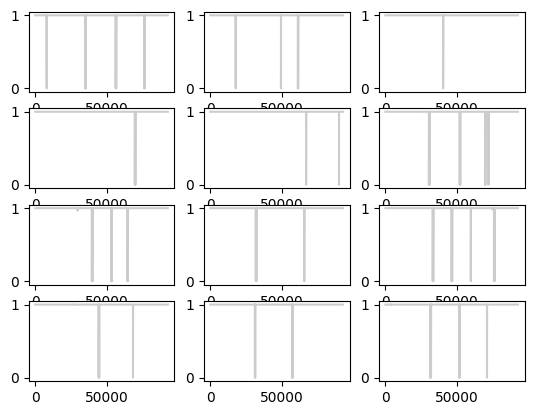

In [7]:
for yi in range(12):
    plt.subplot(4, 3, yi + 1)
    plt.plot(formatted_speed[yi].ravel(), "k-", alpha=.2)
#     plt.text(0.55, 0.85,'Class Label: %d' % (y_train[yi]))

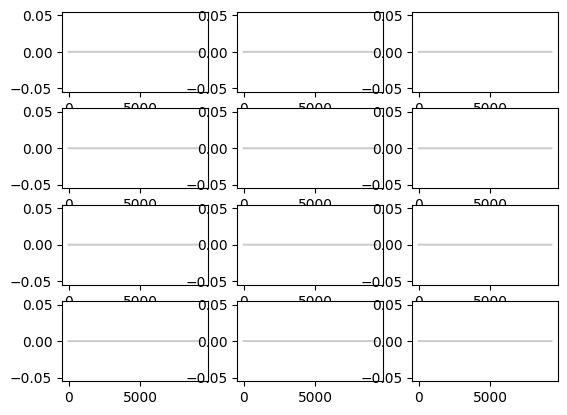

In [8]:
for yi in range(12):
    plt.subplot(4, 3, yi + 1)
    plt.plot(formatted_level[yi].ravel(), "k-", alpha=.2)
#     plt.text(0.55, 0.85,'Class Label: %d' % (y_train[yi]))

Checking number of Clusters using Dynamic Time Warping
The methods are the Elbow method and Silhoutte Score

In [9]:
Sum_of_squared_distances = []
K = range(2,5)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          random_state=42,
                          n_jobs=-1)
    
    km = km.fit(formatted_level)
    Sum_of_squared_distances.append(km.inertia_)
    preds = km.predict(formatted_level)
    sil_score = silhoutte_score(formatted_level, preds, metric="dtw")
    print(sil_score)

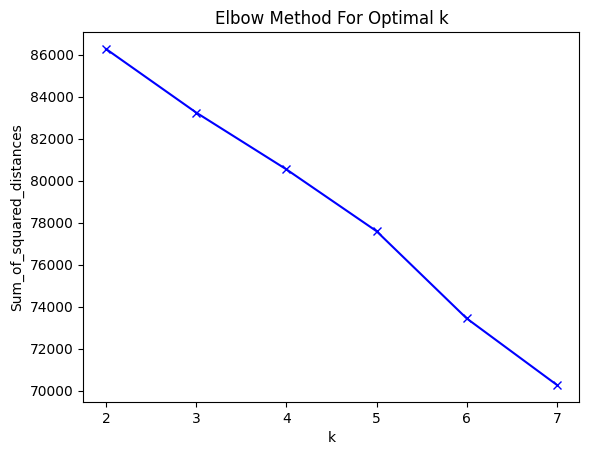

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
Sum_of_squared_distances = []
K = range(2,5)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          random_state=42,
                          n_jobs=-1)
    
    km = km.fit(formatted_speed)
    Sum_of_squared_distances.append(km.inertia_)
    preds = km.predict(formatted_speed)
    sil_score = silhoutte_score(formatted_speed, preds, metric="dtw")
    print(sil_score)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Checking number of Clusters using Euclidean
The methods are the Elbow method and Silhoutte Score

In [ ]:
Sum_of_squared_distances = []
K = range(2,5)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          n_init=2,
                          verbose=True,
                          random_state=42,
                          n_jobs=-1)
    
    km = km.fit(formatted_level)
    Sum_of_squared_distances.append(km.inertia_)
    preds = km.predict(formatted_level)
    sil_score = silhoutte_score(formatted_level, preds, metric="dtw")
    print(sil_score)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
Sum_of_squared_distances = []
K = range(2,5)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          n_init=2,
                          verbose=True,
                          random_state=42,
                          n_jobs=-1)
    
    km = km.fit(formatted_speed)
    Sum_of_squared_distances.append(km.inertia_)
    preds = km.predict(formatted_speed)
    sil_score = silhoutte_score(formatted_speed, preds, metric="dtw")
    print(sil_score)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()